#### AMIRHSSEIN YOUSEFI 97206984

In [0]:
%tensorflow_version 1.x magic
from __future__ import print_function
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(30)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST", one_hot=True)


`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x magic`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


###Let's constructe the network from scratch

In [0]:
tf.reset_default_graph()
sess.close()
!rm -rf ./logs/

In [0]:
# Input
x = tf.placeholder(tf.float32, [None, 784])
# Weight and bias
# tf.random_normal_initializer(0,1)
W_1=tf.get_variable(name="W_1", shape=(784,10), dtype=tf.float32,
                   initializer=tf.random_normal_initializer(0,.1))
b_1 = tf.get_variable(name="bout", shape=(10,), dtype=tf.float32,
                       initializer=tf.initializers.zeros())
W=tf.get_variable(name="W", shape=(10,10), dtype=tf.float32,
                   initializer=tf.random_normal_initializer(0,.1))
b = tf.get_variable(name="b", shape=(10,), dtype=tf.float32,
                       initializer=tf.initializers.zeros())
# Output
y_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1)

y=tf.nn.softmax(tf.matmul(y_1,W)+b)

# Correct Answer
y_ = tf.placeholder(tf.float32, [None, 10])

# Cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#optimization method
train_step = tf.train.GradientDescentOptimizer(2).minimize(cross_entropy)


###Let's visualize the network by tensorboard

In [0]:
######## loss summary for train and test and for the last part uncomment the validation error#########

loss=[]
with tf.name_scope("S_Loss"):
    summary_loss = tf.summary.scalar("train_loss", cross_entropy)
loss_merged_summaries = tf.summary.merge([summary_loss])
with tf.name_scope("S_Loss"):
    summary_loss_test = tf.summary.scalar("test_loss", cross_entropy)
loss_merged_summaries_test = tf.summary.merge([summary_loss_test])
with tf.name_scope("S_Loss"):
    summary_loss_val = tf.summary.scalar("val_loss", cross_entropy)
loss_merged_summaries_val = tf.summary.merge([summary_loss_val])
##############weights and biases histogram and activation functions outputs in order to detect saturation######################
all_weights_summaries = []
with tf.name_scope("layer_1"):
    tf_w1_hist = tf.summary.histogram('weight_hist', tf.reshape(W_1,[-1]))
    tf_b1_hist = tf.summary.histogram('bias_hist', b_1)
    tf_act1=tf.summary.histogram('act1_hist', y_1)
    all_weights_summaries.extend([tf_w1_hist, tf_b1_hist,tf_act1])
with tf.name_scope("layer_2"):
    tf_w2_hist = tf.summary.histogram('weight_hist', tf.reshape(W,[-1]))
    tf_b2_hist = tf.summary.histogram('bias_hist', b)
    tf_act2=tf.summary.histogram('act2_hist', y)
    all_weights_summaries.extend([tf_w2_hist, tf_b2_hist,tf_act2])
param_merged_summaries = tf.summary.merge(all_weights_summaries)


In [0]:
# # add these configurations to session
# config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.9 # making sure Tensorflow doesn't overflow the GPU
# sess = tf.InteractiveSession(config=config)

###Let's run the model

In [0]:
sess = tf.Session()
summ_writer = tf.summary.FileWriter("logs/03", sess.graph)

init = tf.initialize_all_variables()

sess.run(init)


###Training process

In [0]:
#############uncomment everything related to validation for last part
a=[]
b=[]
c=[]
d=[]
count=0
minimum_val_loss = float("inf")
#########Uncomment whatever you want to be monitored ###########
for i in range(60000):
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    batch_xs_test, batch_ys_test = mnist.test.next_batch(1000)
    batch_xs_val, batch_ys_val = mnist.validation.next_batch(5000)
#     _,loss=sess.run([train_step,cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    _,loss,los_sum,wb_sum=sess.run([train_step,cross_entropy, loss_merged_summaries, param_merged_summaries], feed_dict={x: batch_xs, y_: batch_ys})
    loss_test,los_test=sess.run([cross_entropy,loss_merged_summaries_test], feed_dict={x: batch_xs_test, y_: batch_ys_test})
    loss_val,los_val=sess.run([cross_entropy,loss_merged_summaries_val], feed_dict={x: batch_xs_val, y_: batch_ys_val})
    summ_writer.add_summary(los_sum, i)
    summ_writer.add_summary(wb_sum, i)
    summ_writer.add_summary(los_test, i)
    summ_writer.add_summary(los_val, i)
    # correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    # accuracy_train = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # accuracy_train=sess.run(accuracy_train, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    # accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # accuracy_test=sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})


###Uncomment bellow instruction for last part(early-stopping)###
#####Some explenation for bellow code: in order to detect where to stop the algorithm we should chose
##### threshold that is how much time we allow validation decrement along the all learning steps which
##### here is 10 


####bellow code is just for plotting validation error and you can omit that ####
    # if i%1000==0:
    #   print('validation loss is',loss_val,'step=',i)
    #   c.append(loss_val)



######uncomment below code for Early-stopping######
    # if loss_val< minimum_val_loss:
    #   minimum_val_loss=loss_val
#####
    # print('test loss is',loss_test,'step=',i)
    a.append(loss)
    b.append(loss_test)
    # c.append(loss_val)
######uncomment below code for Early-stopping and threshold here is specified that is 10###### 
    # if loss_val> minimum_val_loss:
    #   count+=1
    # if count>10:
    #   break
      

    # c.append(accuracy_train)
    # d.append(accuracy_test)
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('test accuracy =',sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
print('train accuracy =',sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))


validation loss is 2.2851455 step= 0
validation loss is 0.250065 step= 1000
validation loss is 0.23382354 step= 2000
validation loss is 0.23417835 step= 3000
validation loss is 0.23052473 step= 4000
validation loss is 0.27206188 step= 5000
validation loss is 0.22970234 step= 6000
validation loss is 0.23634468 step= 7000
validation loss is 0.23482695 step= 8000
validation loss is 0.23400798 step= 9000
validation loss is 0.24046597 step= 10000
validation loss is 0.231222 step= 11000
validation loss is 0.23774216 step= 12000
validation loss is 0.24163792 step= 13000
validation loss is 0.2603158 step= 14000
validation loss is 0.24325806 step= 15000
validation loss is 0.24588999 step= 16000
validation loss is 0.25079057 step= 17000
validation loss is 0.24217908 step= 18000
validation loss is 0.24400394 step= 19000
validation loss is 0.2511086 step= 20000
validation loss is 0.25171876 step= 21000
validation loss is 0.25600755 step= 22000
validation loss is 0.26074243 step= 23000
validation l

###Let's visualize results

In [0]:

%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir logs/03



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
###############We trained the network several times with different varaince and each time the 
############### test and train loss is saved i bellow varaiables and finally all of them plotted in 
############## one figure
# var_1=c
# var_2=c
# var_3=c
# var_4=c
var_5=c
# var_1_test=d
# var_2_test=d
# var_3_test=d
# var_4_test=d
var_5_test=d

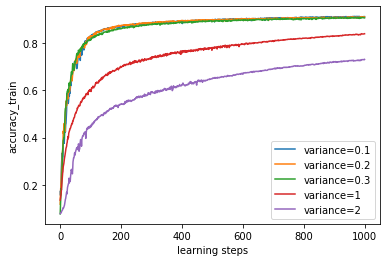

In [0]:
plt.xlabel('learning steps')
plt.ylabel('accuracy_train')
plt.plot(var_1,label='variance=0.1')
plt.plot(var_2,label='variance=0.2')
plt.plot(var_3,label='variance=0.3')
plt.plot(var_4,label='variance=1')
plt.plot(var_5,label='variance=2')
plt.legend()

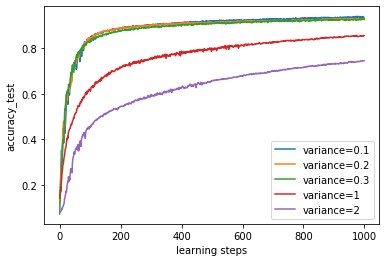

In [0]:
plt.xlabel('learning steps')
plt.ylabel('accuracy_test')
plt.plot(var_1_test,label='variance=0.1')
plt.plot(var_2_test,label='variance=0.2')
plt.plot(var_3_test,label='variance=0.3')
plt.plot(var_4_test,label='variance=1')
plt.plot(var_5_test,label='variance=2')
plt.legend()

In [0]:
#######Here network trained by different learning rates and each times train and test error saved 
####### in below variables and finally they plotted in one figure.
#######lr-.001,.005,.01,.05,.1,.5,1
# lr_1=b
# lr_2=b
# lr_3=b
# lr_4=b
# lr_5=b
# lr_6=b
lr_7=b
# lr_1_train=a
# lr_2_train=a
# lr_3_train=a
# lr_4_train=a
# lr_5_train=a
# lr_6_train=a
lr_7_train=a

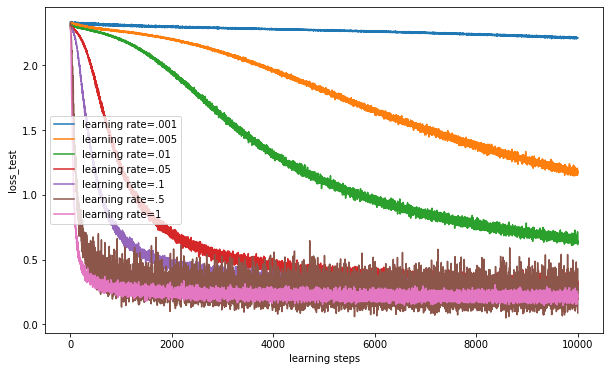

In [0]:

plt.figure(figsize=[10,6])
plt.xlabel('learning steps')
plt.ylabel('loss_test')
plt.plot(lr_1,label='learning rate=.001')
plt.plot(lr_2,label='learning rate=.005')
plt.plot(lr_3,label='learning rate=.01')
plt.plot(lr_4,label='learning rate=.05')
plt.plot(lr_5,label='learning rate=.1')
plt.plot(lr_6,label='learning rate=.5')
plt.plot(lr_7,label='learning rate=1')
plt.legend()

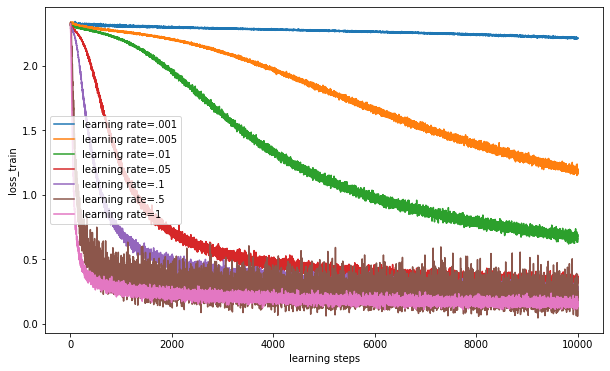

In [0]:
plt.figure(figsize=[10,6])
plt.xlabel('learning steps')
plt.ylabel('loss_train')
plt.plot(lr_1_train,label='learning rate=.001')
plt.plot(lr_2_train,label='learning rate=.005')
plt.plot(lr_3_train,label='learning rate=.01')
plt.plot(lr_4_train,label='learning rate=.05')
plt.plot(lr_5_train,label='learning rate=.1')
plt.plot(lr_6_train,label='learning rate=.5')
plt.plot(lr_7_train,label='learning rate=1')
plt.legend()

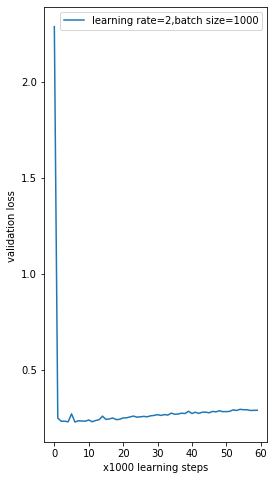

In [0]:
plt.figure(figsize=[4,8])
plt.xlabel("x1000 learning steps")
plt.ylabel("validation loss ")
plt.plot(c,label="learning rate=2,batch size=1000")
plt.legend()

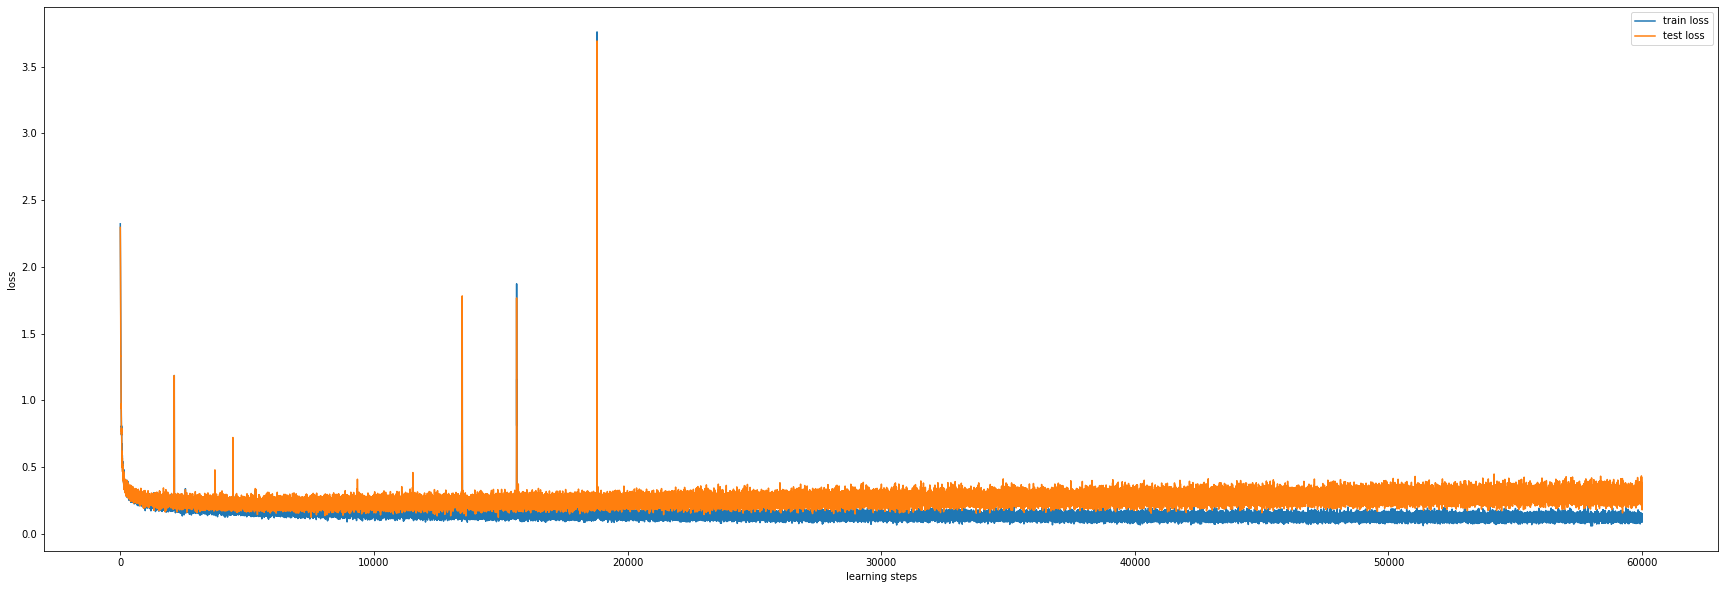

In [0]:
plt.figure(figsize=[30,10])
plt.xlabel("learning steps")
plt.ylabel("loss")
plt.plot(a,label="train loss")
plt.plot(b,label="test loss")
plt.legend()

In [0]:
# plt.xlabel('learning step')
# plt.ylabel('loss_cross entropy')
plt.figure(figsize=[6,6])
# plt.plot(a,label='loss_train')
plt.plot(b,label='loss_test')
# plt.legend()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10f8bce18> (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 24: invalid start byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 24: invalid start byte

<Figure size 432x432 with 1 Axes>

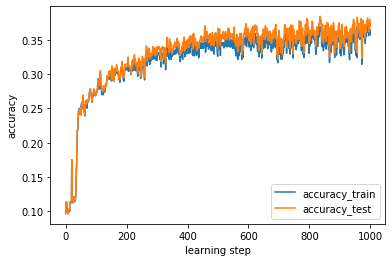

In [0]:
plt.xlabel('learning step')
plt.ylabel('accuracy')
plt.plot(c,label='accuracy_train')
plt.plot(d,label='accuracy_test')
plt.legend()